# Figure 7

Consider the family of symmetric payment streams $\{ (\tau_n^\lambda, \Delta_n^\lambda)_{n \geq 1} \}_{\lambda > 0}$ described in Section 5.2.1.

## Fixed $\lambda$

The code for computing the minimal cost, optimal deposit and reset threshold for $\lambda = 1$ is given below:

In [91]:
import numpy as np
from scipy.optimize import root
from dataclasses import dataclass
import matplotlib.pyplot as plt
import import_ipynb
import GeneralMethod  # Call functions from GeneralMethod without duplicating code

In [93]:
lam = 1

# Cumulative probability between two points when payments are symmetric exponential (Laplace) with mean absolute value 1/lam
def I(x, y):
    if x >= 0:
        return -1 / 2 * (np.exp(-lam * y) - np.exp(-lam * x))
    elif y <= 0:
        return 1 / 2 * (np.exp(lam * y)-np.exp(lam * x))
    else:
        return 1 / 2 * (1 - np.exp(lam * x)) - 1 / 2 * (np.exp(-lam * y) - 1)

In [95]:
params = GeneralMethod.PaymentParams(
    l_A = 100, 
    l_B = 100, 
    C = 1.0, 
    D = 2.0, 
    alpha = (2080 * lam ** 2) / (2080 * lam ** 2 + 0.02), 
    n = 2, 
    I = I  # The function I defined above
)

# Find the optimal cost vector
optimal_cost_vector = GeneralMethod.T_n(params)
print("Optimal cost starting at zero with l_A=100 and l_B=100:", optimal_cost_vector[int(2 * params.n * params.l_A)])

Optimal cost starting at zero with l_A=100 and l_B=100: 44.3315975099876


In [17]:
# 100 + 100 + 44.3315975099876 < 250
GeneralMethod.multi_level_search(params, 10, 250, 1, 10, unidirectional=False, symmetric=True, method='hybr')

Starting coarse search with step size: 10, l_max: 250
l_A = 0.0, l_B = 0.0, V_n = 104000.00000139388
l_A = 10.0, l_B = 10.0, V_n = 4034.1676909088933
l_A = 20.0, l_B = 20.0, V_n = 1203.7770717475464
l_A = 30.0, l_B = 30.0, V_n = 579.5381837961062
l_A = 40.0, l_B = 40.0, V_n = 369.69018865621047
l_A = 50.0, l_B = 50.0, V_n = 283.70167491529605
l_A = 60.0, l_B = 60.0, V_n = 246.4498187289858
l_A = 70.0, l_B = 70.0, V_n = 232.15492901732063
l_A = 80.0, l_B = 80.0, V_n = 230.102325953578
l_A = 90.0, l_B = 90.0, V_n = 235.05071943859284
l_A = 100.0, l_B = 100.0, V_n = 244.3315975099876
l_A = 110.0, l_B = 110.0, V_n = 256.44129528229024
l_A = 120.0, l_B = 120.0, V_n = 270.4710170409603
l_A = 130.0, l_B = 130.0, V_n = 285.8448581034253
Coarse search result: l_A = 80.0, l_B = 80.0, V = 230.102325953578
Starting fine search with step size: 1 around the coarse minimum
l_A = 70.0, l_B = 70.0, V_n = 232.15492901732063
l_A = 71.0, l_B = 71.0, V_n = 231.5141067017257
l_A = 72.0, l_B = 72.0, V_n = 23

(77.0, 77.0, 229.80812565364937)

Therefore, the optimal channel deposits $l_A^* = l_B^* = 77$ and the minimal cost is $230$. The reset threshold(s) on both sides of the channel are $74.5$, as computed below.

In [21]:
params.l_A=77 # optimal l_A
params.l_B=77 # optimal l_B

optimal_cost_vector = GeneralMethod.T_n(params, method='hybr')

print("Bob's reset threshold:", params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[0] / (2 * params.n))
print("Alice's reset threshold:", params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[3] / (2 * params.n))

Bob's reset threshold: 74.5
Alice's reset threshold: -74.5


## Varying $\lambda$

Varying the mean payment amount $\tfrac{1}{\lambda}$ and repeating the above analysis yields the following table:

|       $\tfrac{1}{\lambda}$       |   Minimal cost   |  Optimal deposit  |  Reset threshold  |
|:--------------------------------:|:----------------:|:-----------------:|:------------------:|
|               1                  |       230        |         77        |        74.5       |
|               2.5                |       232        |         78        |        73.5       |
|               5                  |       230        |         74        |        69         |
|               7.5                |       219        |         65        |        62         |
|              10                  |       200        |         52        |        52         |
|              15                  |       165        |         41        |        --         |
|              20                  |       141        |         33        |        --         |
|              30                  |       103        |         15        |        --         |
|              35                  |        83        |          5        |        --         |


Spline interpolation allows us to fit a smooth curve through these points, which can then be used to estimate the minimal cost, optimal deposit(s) and reset threshold(s) at intermediate values.

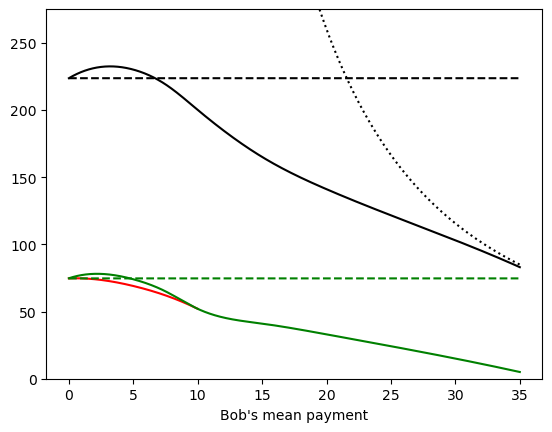

In [79]:
from scipy.interpolate import make_interp_spline

x_rt_values=np.array([0, 2.5, 5, 7.5, 10])
reset_thresholds=np.array([74.65, 73.5, 69, 62, 52])
X_RT_Spline = make_interp_spline(x_rt_values, reset_thresholds)
X_RT_ = np.linspace(x_rt_values.min(), x_rt_values.max(), 10000)
RT_ = X_RT_Spline(X_RT_)

x_oc_values=np.array([0, 2.5, 5, 7.5, 10, 15, 20, 30, 35])
optimal_cost=np.array([223.6, 232, 230, 219, 200, 165, 141, 103, 83])
X_OC_Spline = make_interp_spline(x_oc_values, optimal_cost)
X_OC_ = np.linspace(x_oc_values.min(), x_oc_values.max(), 10000)
OC_ = X_OC_Spline(X_OC_)

x_oa_values=np.array([0, 2.5, 5, 7.5, 10, 15, 20, 30, 35])
optimal_allocations=np.array([74.75, 78, 74, 65, 52, 41, 33, 15, 5])
X_OA_Spline = make_interp_spline(x_oa_values, optimal_allocations)
X_OA_ = np.linspace(x_oa_values.min(), x_oa_values.max(), 10000)
OA_ = X_OA_Spline(X_OA_)

plt.plot(X_OC_, OC_, color='black', label='Optimal cost')
plt.plot(X_RT_, RT_, color='red', label='Reset threshold')
plt.plot(X_OA_, OA_, color='green', label='Optimal allocation')
x = np.linspace(0.01, 35, 3500)
plt.plot(x, 2080/(0.02 * (x**2)), color='black', linestyle='dotted')
plt.plot(x, [74.65]*3500, color='green', linestyle='dashed')
plt.plot(x, [223.6]*3500, color='black', linestyle='dashed')
plt.ylim(0, 275)
plt.xlabel("Bob's mean payment")
plt.show()